In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mode

In [2]:
df = pd.read_csv('../data/chess_games.csv')

Se borra opening_response, debido a que solo posee un 6% de los datos, en comparación con el resto de las columnas.

In [3]:
df = df.drop(columns=['opening_response'])

Se reemplazan los valores nulos por Without Variation en opening_variation, ya que en opening_fullname, las aperturas poseen un nombre, y separado por un :, la variación, y todas las opening_variation nulas, no poseen esos dos puntos. 

In [4]:
df[df['opening_variation'].isnull()].head(2)

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN
10,11,False,39,Mate,White,20+60,daniel_likes_chess,1381,anaissac,1272,e3 e6 d4 d6 Bd3 c6 Nf3 Be7 Nc3 Nf6 Bd2 Bd7 Qe2...,A00,1,Van't Kruijs Opening,Van't Kruijs Opening,NaN


In [5]:
df[df['opening_variation'] == 'Kennedy Variation'].head(2)

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,Kennedy Variation
7,8,False,9,Resign,Black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,5,Nimzowitsch Defense: Kennedy Variation | Link...,Nimzowitsch Defense,Kennedy Variation


In [6]:
df['opening_variation'] = df['opening_variation'].fillna('Without variation')

In [7]:
df.isna().sum()

game_id              0
rated                0
turns                0
victory_status       0
winner               0
time_increment       0
white_id             0
white_rating         0
black_id             0
black_rating         0
moves                0
opening_code         0
opening_moves        0
opening_fullname     0
opening_shortname    0
opening_variation    0
dtype: int64

Se puede observar que tanto `turns` como `opening_moves` poseen outliers, por lo que se procederá a eliminarlos.

Text(0.5, 0, 'Opening moves')

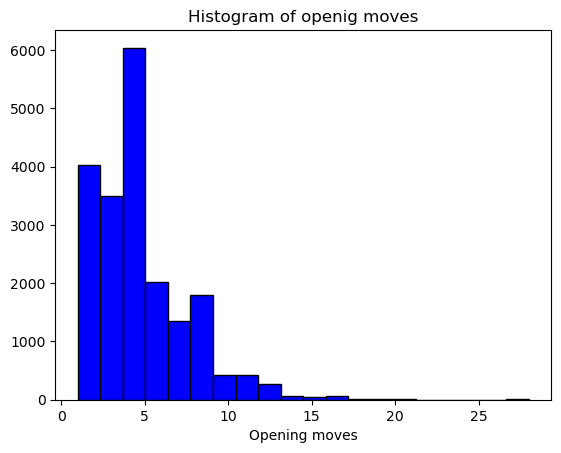

In [8]:
plt.hist(df['opening_moves'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of openig moves')
plt.xlabel('Opening moves')

Text(0.5, 0, 'Turns')

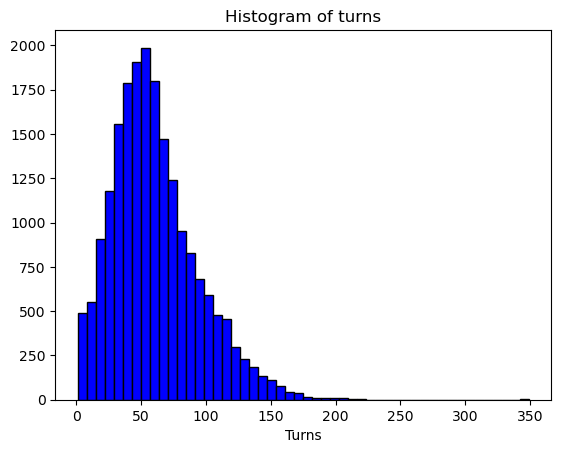

In [9]:
plt.hist(df['turns'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of turns')
plt.xlabel('Turns')

Se usa IQR (Q3-Q1) para eliminar los outliers de `turns` y `opening_moves`.

In [10]:
def impute_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper,
       df.mean(),
       np.where(
           df < lower,
           df.mean(),
           df
           )
       )

   return df

In [11]:
df['turns'] = impute_outliers_IQR(df['turns'])
df['opening_moves'] = impute_outliers_IQR(df['opening_moves'])

Text(0.5, 0, 'Opening moves')

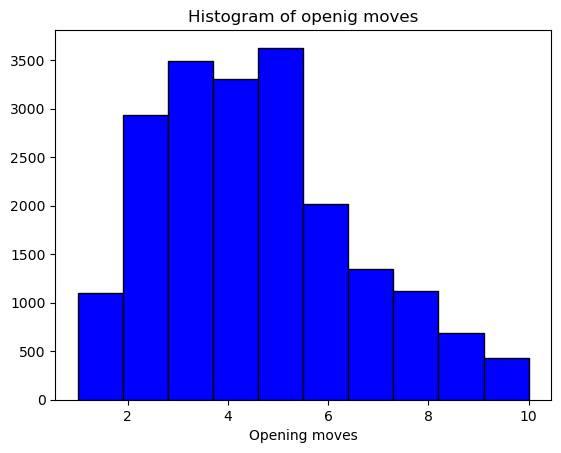

In [12]:
plt.hist(df['opening_moves'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of openig moves')
plt.xlabel('Opening moves')

Text(0.5, 0, 'Turns')

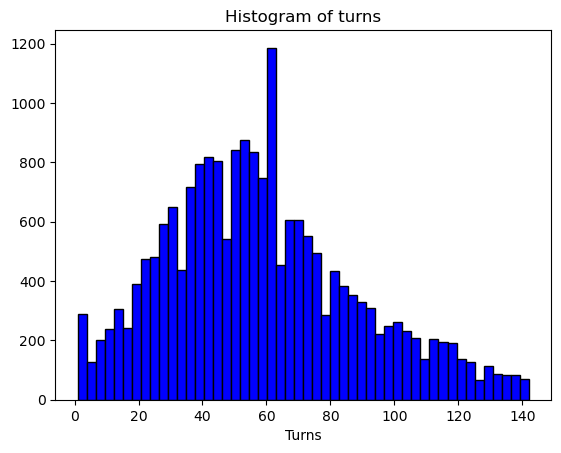

In [47]:
plt.hist(df['turns'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of turns')
plt.xlabel('Turns')

# Creación de variables
- rating_gap(int): Diferecia de rating entre ambos jugadores.
  - Sirve para ver si el rating influye en el resultado de la partida.
  - Ej: Ver si el jugador con mayor rating gana más partidas.
-  most_used_movement(string): Movimiento más usado en la partida.
   - Sirve para analizar si hay movimientos usados por los jugadores que influyan en el resultado de la partida.
   - Ej: Todos los jugadores que usan constantemente el movimiento X, ganan más partidas.
 - total_time(int): Tiempo total de la partida.
   - Sirve para analizar si el tiempo influye en el resultado de la partida.
   - Ej: Cuando dos jugadores de elo alto juegan, la partida dura más tiempo.
 - turns_without_opening(int): Cantidad de turnos sin apertura.
   - Sirve para analizar si el juego medio influye en el resultado de la partida.
   - Ej: Los jugadores que realizan mas turnos en el juego medio ganan más partidas.

In [31]:
df['rating_gap'] = abs(df['white_rating'] - df['black_rating'])

df['most_used_movement'] = df['moves'].str.split(' ').apply(lambda x: mode(x))

df['total_time'] = ((df['time_increment'].str.split('+').apply(lambda x: int(x[1])) * df['turns']) / 60).apply(lambda x: int(x)) + df['time_increment'].str.split('+').apply(lambda x: int(x[0]))

df['turns_without_opening'] = df['turns'] - df['opening_moves']

In [32]:
# Guardar el dataframe en un archivo csv
df.to_csv('../data/chess_games_clean.csv', index=False)